# CHAPTER 11  
***  
# Scraping JavaScript

frequently encounter only two languages online: 
 - Action‐Script (which is used by Flash applications) 
 - JavaScript  
  - `JavaScript` is, by far, the most common and most well-supported `client-side` scripting language on the web today.  
  - can be used to collect information for user tracking, submit forms without reloading the page, embed multimedia, and even power entire online games.  
  - You can find it embedded between `script` tags in the page’s source code:

<script>
alert("This creates a pop-up using JavaScript"); 
</script>

## A Brief Introduction to JavaScript  
***  
JavaScript  


<script>
function fibonacci(a, b){
    varnextNum=a+b;
    console.log(nextNum+" is in the Fibonacci sequence"); 
    if(nextNum < 100){
        fibonacci(b, nextNum);
    }
}
fibonacci(1, 1); 
</script>

## Common JavaScript Libraries  
***  
Executing JavaScript by using Python can be extremely time-consuming and pro‐ cessor intensive, especially if you’re doing it on a large scale. 

### jQuery  
***  
jQuery is an extremely common library, used by 70% of the most popular internet sites  
 - site using jQuery is readily identifiable  
 - If jQuery is found on a site, you must be careful when scraping it.  
  - dynamically creating HTML content that appears only after the JavaScript is executed

<script src="http://ajax.googleapis.com/ajax/libs/jquery/1.9.1/jquery.min.js"></ script>

### Google Analytics  
***  
the most common JavaScript library and the most popular user tracking tool on the internet.  
Determining whether a page is using Google Analytics is easy.  
 - will have JavaScript at the bottom  
<br>  

If a site uses Google Analytics or a similar web analytics system, and you do not want the site to know that it’s being crawled or scraped,   
 - make sure to discard any cookies used for analytics or discard cookies altogether.

This script handles Google Analytics–specific cookies used to track your visit from page to page.  
 - can sometimes be a problem for web scrapers that are designed to execute JavaScript and handle cookies (such as those that use Selenium)

<!-- Google Analytics -->
<script type="text/javascript">
var _gaq = _gaq || []; _gaq.push(['_setAccount', 'UA-4591498-1']); _gaq.push(['_setDomainName', 'oreilly.com']); _gaq.push(['_addIgnoredRef', 'oreilly.com']); _gaq.push(['_setSiteSpeedSampleRate', 50]); _gaq.push(['_trackPageview']);
  
(function() { var ga = document.createElement('script'); ga.type = 'text/javascript'; ga.async = true; ga.src = ('https:' == document.location.protocol ? 'https://ssl' : 'http://www') + '.google-analytics.com/ga.js'; var s = document.getElementsByTagName('script')[0]; s.parentNode.insertBefore(ga, s); })();
</script>

## Google Maps    
***  
One of the most common ways to denote a location in Google Maps is through a marker (also known as a pin).  
 - Python makes it easy to `extract all instances of coordinates` that occur between <font color=pink>google.maps.LatLng</font>( and ) to `obtain a list of latitude/longitude `coordinates.

In [ ]:
# Markers can be inserted into any Google Map by 
var marker = new google.maps.Marker({
    position: new google.maps.LatLng(-25.363882,131.044922), map: map,title: 'Some marker text'
});

## Ajax and Dynamic HTML  
***   
###  Ajax
Until now, the only way we’ve had of communicating with a web server is to `send it some sort of HTTP request` via the retrieval of a new page.     
<br>  

Ajax is not a language but a group of technologies used to accomplish a certain task   
 - `Asynchronous JavaScript and XML`(Ajax)  
 -  is used to send information to and receive it from a web server without making a separate page request  
 - his website will be written in Ajax.” -> X  
 “This form will use Ajax to communicate with the web server -> O  
  
### dynamic HTML (DHTML)   
is a collection of technologies used for a common purpose  
HTML code, CSS language, or both that changes as client-side scripts change HTML elements on the page
 - boring, static-looking pages on the internet can have DHTML processes running behind  
<br>  

Both of these are caused by a failure of your scraper to execute the JavaScript  

 - content you are viewing in your browser does not match the content you see in the source code you’re retrieving from the site.  
  
 - The web page might also have a loading page that appears to redirect you to another page of results  
  - notice that the page’s URL never changes when this redirect happens.  
 - only two solutions:   
  - scrape the content directly from the JavaScript;   
  - or use Python packages capable of executing the JavaScript itself, and scrape the website as you view it in your browser.

# Executing JavaScript in Python with Selenium  
***  
Selenium does not contain its own web browser;   
 - it requires integration with third- party browsers in order to run.   
 - prefer my scripts to run quietly in the background, so I use a tool called `PhantomJS` in lieu of an actual browser  
 #### PhantomJS   
  - is what is known as a headless browser  
  - loads websites into memory and executes JavaScript on the page  

By combining Selenium with PhantomJS, you can run an extremely powerful web scraper that handles cookies, JavaScript, headers, and everything else you need with ease.  
####  Selenium    
 - https://pypi.org/project/selenium/
 - pip install -U selenium  

#### PhantomJS  
 - https://phantomjs.org/download.html  
 - cannot be installed with pip.  
 - brew cask install phantomjs

This page contains some sample text, hardcoded into the page’s HTML, that is replaced by Ajax-generated content after a two-second delay.  
 - scrape this page’s data by using traditional methods, you’d get only the loading page, without getting the data that you want.  

Selenium library   
 - is an API called on the object WebDriver.   
 - The WebDriver is a bit like a browser in that it can load websites, but it can also be used like a BeautifulSoup object to find page elements, interact with elements on the page (send text, click, etc.), and do other actions to drive the web scrapers.

http://pythonscraping.com/pages/javascript/ajaxDemo.html  
<font color=gray>2초동안</font>
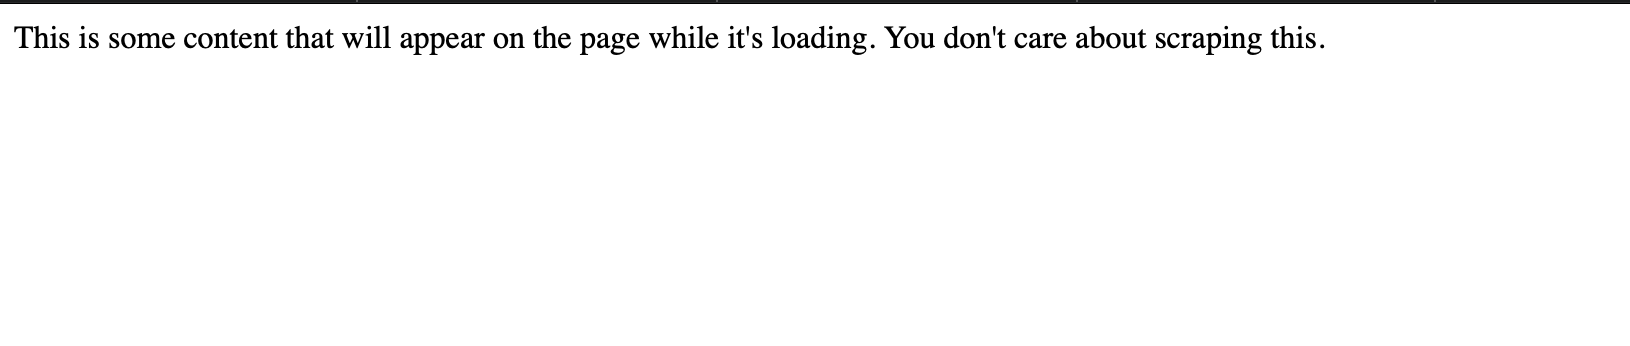

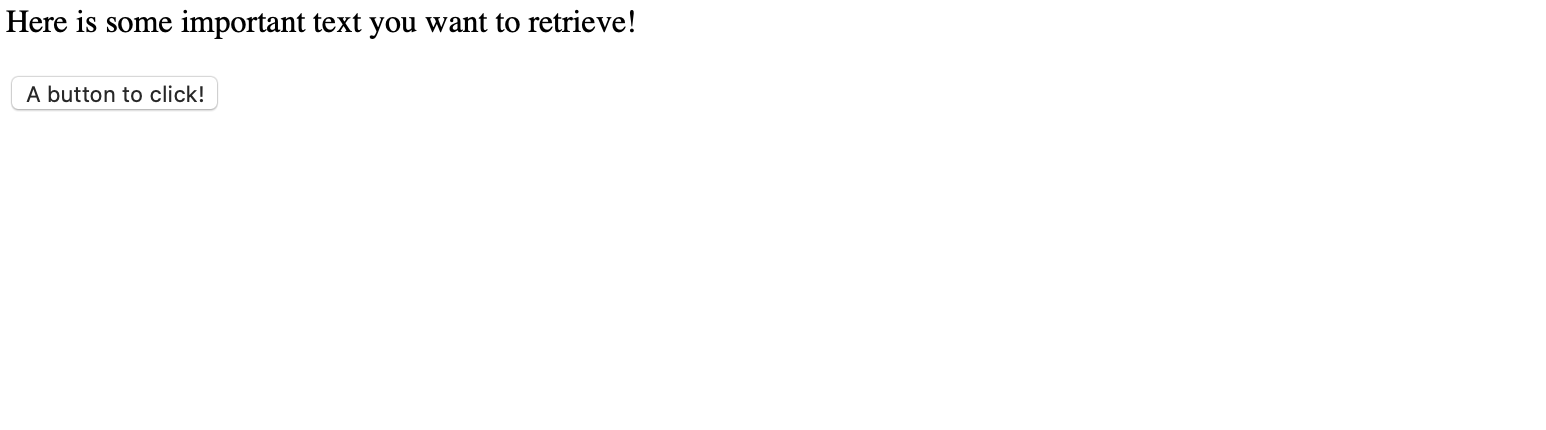

In [10]:
# code retrieves text behind an Ajax “wall” on the test page:    
# This creates a new Selenium WebDriver, using the PhantomJS library

from selenium import webdriver 
import time

driver = webdriver.PhantomJS(executable_path='/usr/local/bin/phantomjs') 
#  need to point Selenium in the right direction when creating a new PhantomJS Web‐Driver:
# 'usr/x/x/phantomjs-2.1.1-macosx/bin/phantomjs'

driver.get('http://pythonscraping.com/pages/javascript/ajaxDemo.html') 
# WebDriver to load a page 

time.sleep(3)
# and then pauses execution for three seconds before looking at the page 

print(driver.find_element_by_id('content').text)
# to retrieve the (hopefully loaded) content.
# although the page itself contains an HTML button, 
# Selenium’s text function retrieves the text value of the button.

driver.close()

Here is some important text you want to retrieve!
A button to click!


In [11]:
# phantomJS 1 second

from selenium import webdriver 
import time

driver = webdriver.PhantomJS(executable_path='/usr/local/bin/phantomjs') 
driver.get('http://pythonscraping.com/pages/javascript/ajaxDemo.html') 
time.sleep(1)
# and then pauses 1 second 

print(driver.find_element_by_id('content').text)

driver.close()

This is some content that will appear on the page while it's loading. You don't care about scraping this.


In [24]:
# chrome 3 seconds

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time

chrome_options = Options()
chrome_options.add_argument("--headless")
driver = webdriver.Chrome(
    executable_path='/usr/local/bin/chromedriver', 
    options=chrome_options)
driver.get('http://pythonscraping.com/pages/javascript/ajaxDemo.html')
time.sleep(3)
print(driver.find_element_by_id('content').text)
driver.close()

Here is some important text you want to retrieve!
A button to click!


# Selenium Selectors   
***  
 previously you’ve selected page elements by using <font color=green>BeautifulSoup</font> selectors, such as <font color=pink>find</font> and <font color=pink>find_all</font>.   
 -  used the selector <font color=pink>find_element_by_id</font> 
       
       driver.find_element_by_css_selector('#content')  
       driver.find_element_by_tag_name('div')  
 - If you want to select multiple elements on the page these element selectors can return a Python list of elements by using <font color=pink>elements</font> (i.e., make it plural):  
 
       driver.find_elements_by_css_selector('#content')  
       driver.find_elements_by_css_selector('div')

 

#### If you still want to use BeautifulSoup to parse this content  
 - by using Web‐Driver’s <font color=pink>page_source</font> function, which returns the page’s source, as viewed by the DOM at that current time, as a string:  
         pageSource = driver.page_source  
         bs = BeautifulSoup(pageSource, 'html.parser')  
         print(bs.find(id='content').get_text())

 #### Page-load times are inconsistent  
  - more efficient solution would repeatedly check for the existence of a particular element on a fully loaded page and return only when that element exists:  

<br>  
implicit wait differs from an explicit wait   
 - `implicit wait` waits for a certain state in the DOM to occur before continuing,   
 - `explicit wait` defines a hardcoded time.    
 - `locator` is used to find elements with the ID  
 - `Locators` can also be used to create selectors, using the <font color=pink>find_element </font>WebDriver function:  
 - `locator` handy tool is used for a variety of applications and has a great degree of flexibility.
 
 <font color=pink></font>

<font color=pink>ID</font>  
 - finds elements by their HTML `id` attribute.  

<font color=pink>CLASS_NAME</font>
 - Used to find elements by their HTML class attribute.  
  
<font color=pink>SS_SELECTOR</font>  
 - Finds elements by their class, `id`, or `tag name`, using the #idName, .className, tagName convention.  

<font color=pink>LINK_TEXT</font>  
 - Finds HTML \< a \> tags by the text they contain. For example, a link labeled “Next” can be selected using (By.LINK_TEXT, "Next").  

<font color=pink>PARTIAL_LINK_TEXT</font>
 - Similar to `LINK_TEXT`, but matches on a partial string.  

<font color=pink>NAME</font>
 - Finds HTML tags by their `name attribute`. This is handy for HTML forms.  

<font color=pink>TAG_NAME</font>
 - Finds HTML tags by their `tag name`.  

<font color=pink>XPATH</font>
 - Uses an `XPath expression` (the syntax of which is described in the following sidebar) to select matching elements.
<font color=pink></font>

In [15]:
# PhantomJS
from selenium import webdriver
from selenium.webdriver.common.by import By

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
# WebDriverWait and expected_conditions, 
# both of which are combined here to form what Selenium calls an implicit wait.
# implicit wait, the triggering DOM state is defined by expected_condition



driver = webdriver.PhantomJS(executable_path='/usr/local/bin/phantomjs') 
driver.get('http://pythonscraping.com/pages/javascript/ajaxDemo.html') 
try:
    element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, 'loadedButton')))
        # locator is used to find elements with the ID loadedButton:
        # (EC <- expected_condition , a common convention used for brevity)
finally: 
    print(driver.find_element_by_id('content').text) 
    driver.close()

/Users/j/handsonml/my_env/lib/python3.7/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


Here is some important text you want to retrieve!
A button to click!


In [25]:
# chrome

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

chrome_options = Options()
chrome_options.add_argument("--headless")
driver = webdriver.Chrome(
    executable_path='/usr/local/bin/chromedriver',
    options=chrome_options)

driver.get('http://pythonscraping.com/pages/javascript/ajaxDemo.html')
try:
    element = WebDriverWait(driver, 10).until(
                       EC.presence_of_element_located((By.ID, 'loadedButton')))
finally:
    print(driver.find_element_by_id('content').text)
    driver.close()

Here is some important text you want to retrieve!
A button to click!


#### xPATH  
***  


## Additional Selenium Webdrivers  
***  
 - If your code is running PhantomJS and fails  
 - Tests may depend on a specific browser in order to run.  
 - unusually finicky website or script may behave slightly differently on different browsers. Your code simply may not work in PhantomJS.  
 https://selenium.dev/downloads  
   
<br>  
       
    firefox_driver = webdriver.Firefox('<path to Firefox webdriver>')  
    chrome_driver = webdriver.Chrome('<path to Chrome webdriver>') 
    safari_driver = webdriver.Safari('<path to Safari webdriver>')  
    ie_driver = webdriver.Ie('<path to Internet Explorer webdriver>')



### Handling Redirects
***  
page redirects that are executed in your browser by Java‐ Script, rather than a redirect performed on the server  
  
It can sometimes be tricky to tell the difference when visiting a page in your web browser.  - The redirect might happen so fast  
- assume that a client-side redirect is actually a server-side redirect  
- `A server-side` redirect,   
 - depending on how it is handled, can be easily traversed by Python’s <font color=pink>urllib</font> library  
- `Client-side` redirects   
 - won’t be handled at all unless something is executing the Java‐Script.  
- `primary issue` with these redirects is when to stop page execution—that is, how to tell when a page is done redirecting

In [30]:
# StaleElementReferenceException;   
# the element is no longer attached to the page’s DOM and the site has redirected:

from selenium import webdriver
import time
from selenium.webdriver.remote.webelement import WebElement
from selenium.common.exceptions import StaleElementReferenceException

def waitForLoad(driver):
    elem = driver.find_element_by_tag_name("html") 
    count = 0
    while True:
        count += 1
        if count > 20:
            print('Timing out after 10 seconds and returning')
            return
        time.sleep(.5) 
        #  script checks the page every half second, with a time-out of 10 seconds(0.5 x 20=10)
        
        try:
            elem == driver.find_element_by_tag_name('html') 
        except StaleElementReferenceException:
            return
driver = webdriver.PhantomJS(executable_path='/usr/local/bin/phantomjs') 
driver.get('http://pythonscraping.com/pages/javascript/redirectDemo1.html') 
waitForLoad(driver)
print(driver.page_source)


Timing out after 10 seconds and returning
<html><head>
<title>The Destination Page!</title>

</head>
<body>
This is the page you are looking for!

</body></html>


In [26]:
# chrome

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.remote.webelement import WebElement
from selenium.common.exceptions import StaleElementReferenceException
import time

def waitForLoad(driver):
    elem = driver.find_element_by_tag_name("html")
    count = 0
    while True:
        count += 1
        if count > 20:
            print("Timing out after 10 seconds and returning")
            return
        time.sleep(.5)
        try:
            elem == driver.find_element_by_tag_name("html")
        except StaleElementReferenceException:
            return
chrome_options = Options()
chrome_options.add_argument("--headless")
driver = webdriver.Chrome(
    executable_path='/usr/local/bin/chromedriver',
    options=chrome_options)
driver.get("http://pythonscraping.com/pages/javascript/redirectDemo1.html")
waitForLoad(driver)
print(driver.page_source)
driver.close()

Timing out after 10 seconds and returning
<html><head>
<title>The Destination Page!</title>

</head>
<body>
This is the page you are looking for!

</body></html>


#### Alternatively, you can write a similar loop checking the current URL of the page until the URL changes,  or it matches a specific URL that you’re looking for.
 -  time-out of 15 seconds and an XPath selector that looks for the page body content 

In [29]:

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

chrome_options = Options()
chrome_options.add_argument("--headless")
driver = webdriver.Chrome(
    executable_path='/usr/local/bin/chromedriver', 
    options=chrome_options)
driver.get('http://pythonscraping.com/pages/javascript/redirectDemo1.html')
try:
    bodyElement = WebDriverWait(driver, 15).until(EC.presence_of_element_located(
        (By.XPATH, '//body[contains(text(), "This is the page you are looking for!")]')))
    print(bodyElement.text)
except TimeoutException:
    print('Did not find the element')

This is the page you are looking for!


# A Final Note on JavaScript  
***  
Most sites today on the internet use JavaScript  
 -  tracking tools, 
 - controlling a small section of the site,   
 - or manipulating a drop-down menu  
 - Once Selenium is used, the HTML and CSS on the page can be read and parsed as you would with any other website code  
 -  HTTP requests and responses can be sent and handled by your code via the techniques in earlier chapters, even without using Selenium.  

`JavaScript can even be a benefit` to web scrapers, because its use as a “browser-side content management system  
 - useful APIs, For more information on this, <font color=green>see Chapter 12</font>.  
 - can find information on Selenium and interacting directly with dynamic websites, including drag-and-drop interfaces, in <font color=green>Chapter 14</font>.